### An incremental algorithm can find nice $k$-clusterings if allowed $2^k$ centers

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster


In [86]:
# unique nice clustering dataset
def unique_nice_clustered_data(k=4, dim=2, cluster_size=25, seed=42):
    np.random.seed(seed)
    data = np.zeros((cluster_size * k, dim))
    for k_i in range(1, k+1):
        center = np.array([np.random.uniform(5*k_i, 15*k_i) for i in range(dim)])
        # generate cluster_size points centered around center
        data[(k_i - 1) * cluster_size:k_i * cluster_size, :] = center + np.random.randn(cluster_size, dim)
    return data


[[ 9.39308973 16.03017292]
 [ 8.51124781 14.27300611]
 [10.324614   15.27457779]
 [ 8.2759268  15.04970311]
 [ 8.2819835  14.04141331]
 [ 8.98736346 12.59386282]
 [ 7.02048336 13.94485553]
 [ 7.73257007 14.8213904 ]
 [ 7.83737711 13.09483936]
 [10.21104996 14.28136676]
 [13.44909292 20.39561136]
 [12.84248207 20.66038679]
 [13.39283695 19.99299502]
 [13.39176903 22.13696695]
 [13.97997842 19.22697784]
 [14.81602056 19.06384512]
 [14.20233924 18.32501864]
 [12.66528959 20.48155   ]
 [14.73194222 20.45605705]
 [13.87782736 19.98358507]
 [26.19967992 24.19759318]
 [27.00393698 21.3774308 ]
 [26.98440266 22.75538867]
 [25.98339669 23.75214724]
 [27.69131821 24.07175107]
 [25.82110117 22.83125858]
 [26.99158212 24.11601608]
 [26.18114445 22.95481198]
 [25.55398372 21.94426433]
 [27.47284451 24.49671098]
 [55.85014573 38.24347725]
 [55.84990531 40.42663357]
 [55.45268366 40.45324066]
 [52.8687646  39.71049951]
 [55.57555677 38.58958966]
 [55.58027048 36.90102809]
 [55.26883782 39.24570958]
 

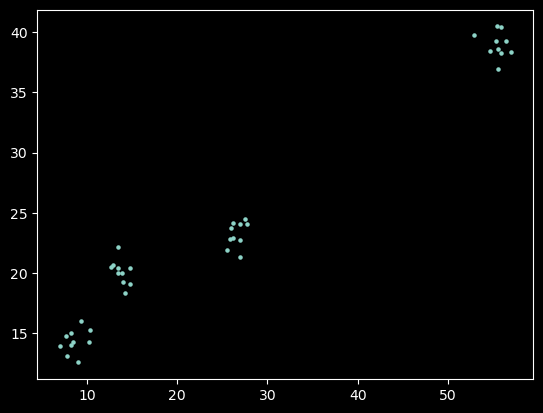

In [122]:
X = unique_nice_clustered_data(k=4, dim=2, cluster_size=10, seed=42)
print(X)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()


In [127]:
class IncrClustering():
    def __init__(self, k, random_state=42):
        self.k = k
        self.centroids = None
        self.cluster_counts = None
        np.random.seed(random_state)
    def Candidates(self, S):
        # S is set of points in X
        # run single linkage on S to get a tree
        # assign each leaf node the corresponding data point
        # move bottom-up, assign each internal node the datapoint in one of its children
        # return all points at a distance < k from the root

        # Run single linkage on S to get a tree
        Z = linkage(S, method='single', metric='euclidean')

        # Get cluster assignments
        clusters = fcluster(Z, t=self.k, criterion='distance')

        # Get the root node (the first cluster)
        root = clusters[0]

        # Return all points at a depth < k from the root
        return [point for point, cluster in zip(S, clusters) if cluster == root or Z[cluster - 1, 2] <self.k]


In [128]:
incremental_clustering = IncrClustering(k=4, random_state=42)
T = incremental_clustering.Candidates(X)
print(len(T))


[array([ 9.39308973, 16.03017292]), array([ 8.51124781, 14.27300611]), array([10.324614  , 15.27457779]), array([ 8.2759268 , 15.04970311]), array([ 8.2819835 , 14.04141331]), array([ 8.98736346, 12.59386282]), array([ 7.02048336, 13.94485553]), array([ 7.73257007, 14.8213904 ]), array([ 7.83737711, 13.09483936]), array([10.21104996, 14.28136676]), array([13.44909292, 20.39561136]), array([12.84248207, 20.66038679]), array([13.39283695, 19.99299502]), array([13.39176903, 22.13696695]), array([13.97997842, 19.22697784]), array([14.81602056, 19.06384512]), array([14.20233924, 18.32501864]), array([12.66528959, 20.48155   ]), array([14.73194222, 20.45605705]), array([13.87782736, 19.98358507]), array([26.19967992, 24.19759318]), array([27.00393698, 21.3774308 ]), array([26.98440266, 22.75538867]), array([25.98339669, 23.75214724]), array([27.69131821, 24.07175107]), array([25.82110117, 22.83125858]), array([26.99158212, 24.11601608]), array([26.18114445, 22.95481198]), array([25.55398372,